In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Historical Product Demand.csv to Historical Product Demand.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv('Historical Product Demand.csv',parse_dates=['Date'])
df.head(75)

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012-07-27,100
1,Product_0979,Whse_J,Category_028,2012-01-19,500
2,Product_0979,Whse_J,Category_028,2012-02-03,500
3,Product_0979,Whse_J,Category_028,2012-02-09,500
4,Product_0979,Whse_J,Category_028,2012-03-02,500
...,...,...,...,...,...
70,Product_1512,Whse_J,Category_019,2012-02-15,20000
71,Product_1274,Whse_J,Category_019,2012-01-31,1000
72,Product_1274,Whse_J,Category_019,2012-02-07,1000
73,Product_1274,Whse_J,Category_019,2012-02-13,1000


In [ ]:
df.dtypes

Product_Code                object
Warehouse                   object
Product_Category            object
Date                datetime64[ns]
Order_Demand                object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Product_Code      1048575 non-null  object        
 1   Warehouse         1048575 non-null  object        
 2   Product_Category  1048575 non-null  object        
 3   Date              1037336 non-null  datetime64[ns]
 4   Order_Demand      1048575 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 40.0+ MB


In [ ]:
df.describe()

,Date
count,1037336
mean,2014-06-17 05:14:07.756175104
min,2011-01-08 00:00:00
25%,2013-04-05 00:00:00
50%,2014-06-10 00:00:00
75%,2015-08-26 00:00:00
max,2017-01-09 00:00:00


In [ ]:
df.columns

Index(['Product_Code', 'Warehouse', 'Product_Category', 'Date',
       'Order_Demand'],
      dtype='object')

In [ ]:
print(df.isnull().any().sum(), ' / ', len(df.columns))
df.isnull().any(axis=1).sum(),'/', len(df)

1  /  5


(11239, '/', 1048575)

In [ ]:
df.isnull().sum()

Product_Code            0
Warehouse               0
Product_Category        0
Date                11239
Order_Demand            0
dtype: int64

In [ ]:
print ('Null to Dataset Ratio for "Dates" Column is '': ',df.isnull().sum()[3]/df.shape[0]*100)

Null to Dataset Ratio for "Dates" Column is :  1.0718355863910547


In [ ]:
df.dropna(axis=0, inplace=True)
df.reset_index(drop=True)
df.sort_values('Date')[1:101]

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
72252,Product_1724,Whse_A,Category_003,2011-05-31,108
8431,Product_1521,Whse_S,Category_019,2011-06-24,85000
8432,Product_1521,Whse_S,Category_019,2011-06-24,7000
72669,Product_1507,Whse_C,Category_019,2011-09-02,1250
17249,Product_0608,Whse_C,Category_001,2011-09-27,5
...,...,...,...,...,...
117741,Product_2114,Whse_A,Category_009,2011-12-12,849
69853,Product_0122,Whse_A,Category_021,2011-12-12,300
117742,Product_2114,Whse_A,Category_009,2011-12-12,41
72789,Product_0471,Whse_C,Category_015,2011-12-12,35


In [ ]:
df['Order_Demand']=df['Order_Demand'].str.replace('(',"")
df['Order_Demand']=df['Order_Demand'].str.replace(')',"")
df.head(100)


,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012-07-27,100
1,Product_0979,Whse_J,Category_028,2012-01-19,500
2,Product_0979,Whse_J,Category_028,2012-02-03,500
3,Product_0979,Whse_J,Category_028,2012-02-09,500
4,Product_0979,Whse_J,Category_028,2012-03-02,500
...,...,...,...,...,...
95,Product_1512,Whse_J,Category_019,2012-06-15,30000
96,Product_1512,Whse_J,Category_019,2012-06-20,30000
97,Product_1512,Whse_J,Category_019,2012-07-04,30000
98,Product_1274,Whse_J,Category_019,2012-06-19,1000


In [ ]:
df['Order_Demand'] = df['Order_Demand'].astype('int64')

In [ ]:
df = df.sort_values(by=['Date', 'Product_Code'])
df = df.set_index('Date')
df.head()

,Product_Code,Warehouse,Product_Category,Order_Demand
Date,,,,
2011-01-08,Product_0965,Whse_A,Category_006,2
2011-05-31,Product_1724,Whse_A,Category_003,108
2011-06-24,Product_1521,Whse_S,Category_019,85000
2011-06-24,Product_1521,Whse_S,Category_019,7000
2011-09-02,Product_1507,Whse_C,Category_019,1250


<ipython-input-14-557dd9eacad9>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Order_Demand'],fit=norm)


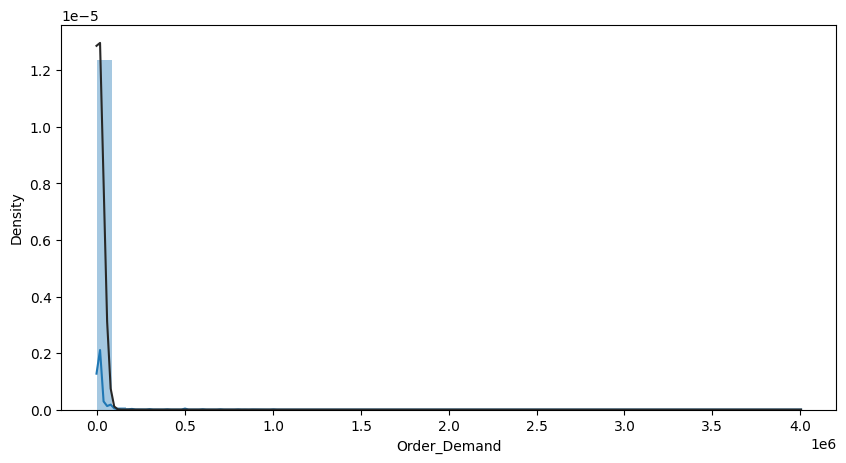

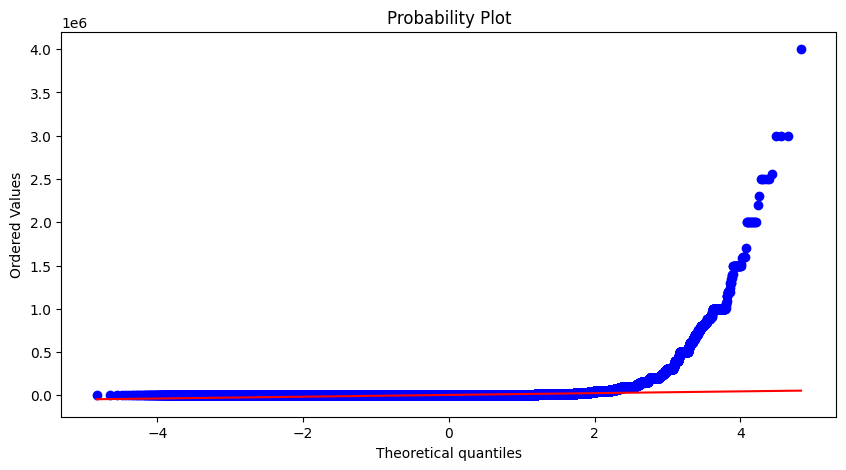

In [ ]:
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,5

sns.distplot(df['Order_Demand'],fit=norm)
fig = plt.figure()
res = stats.probplot(df['Order_Demand'], plot=plt)
plt.show()

In [ ]:
category_yearly_demand = df.groupby([df.index.year, 'Product_Category'])['Order_Demand'].mean()

Text(0.5, 1.02, 'Yearly Average Demand for all the Product Categories')

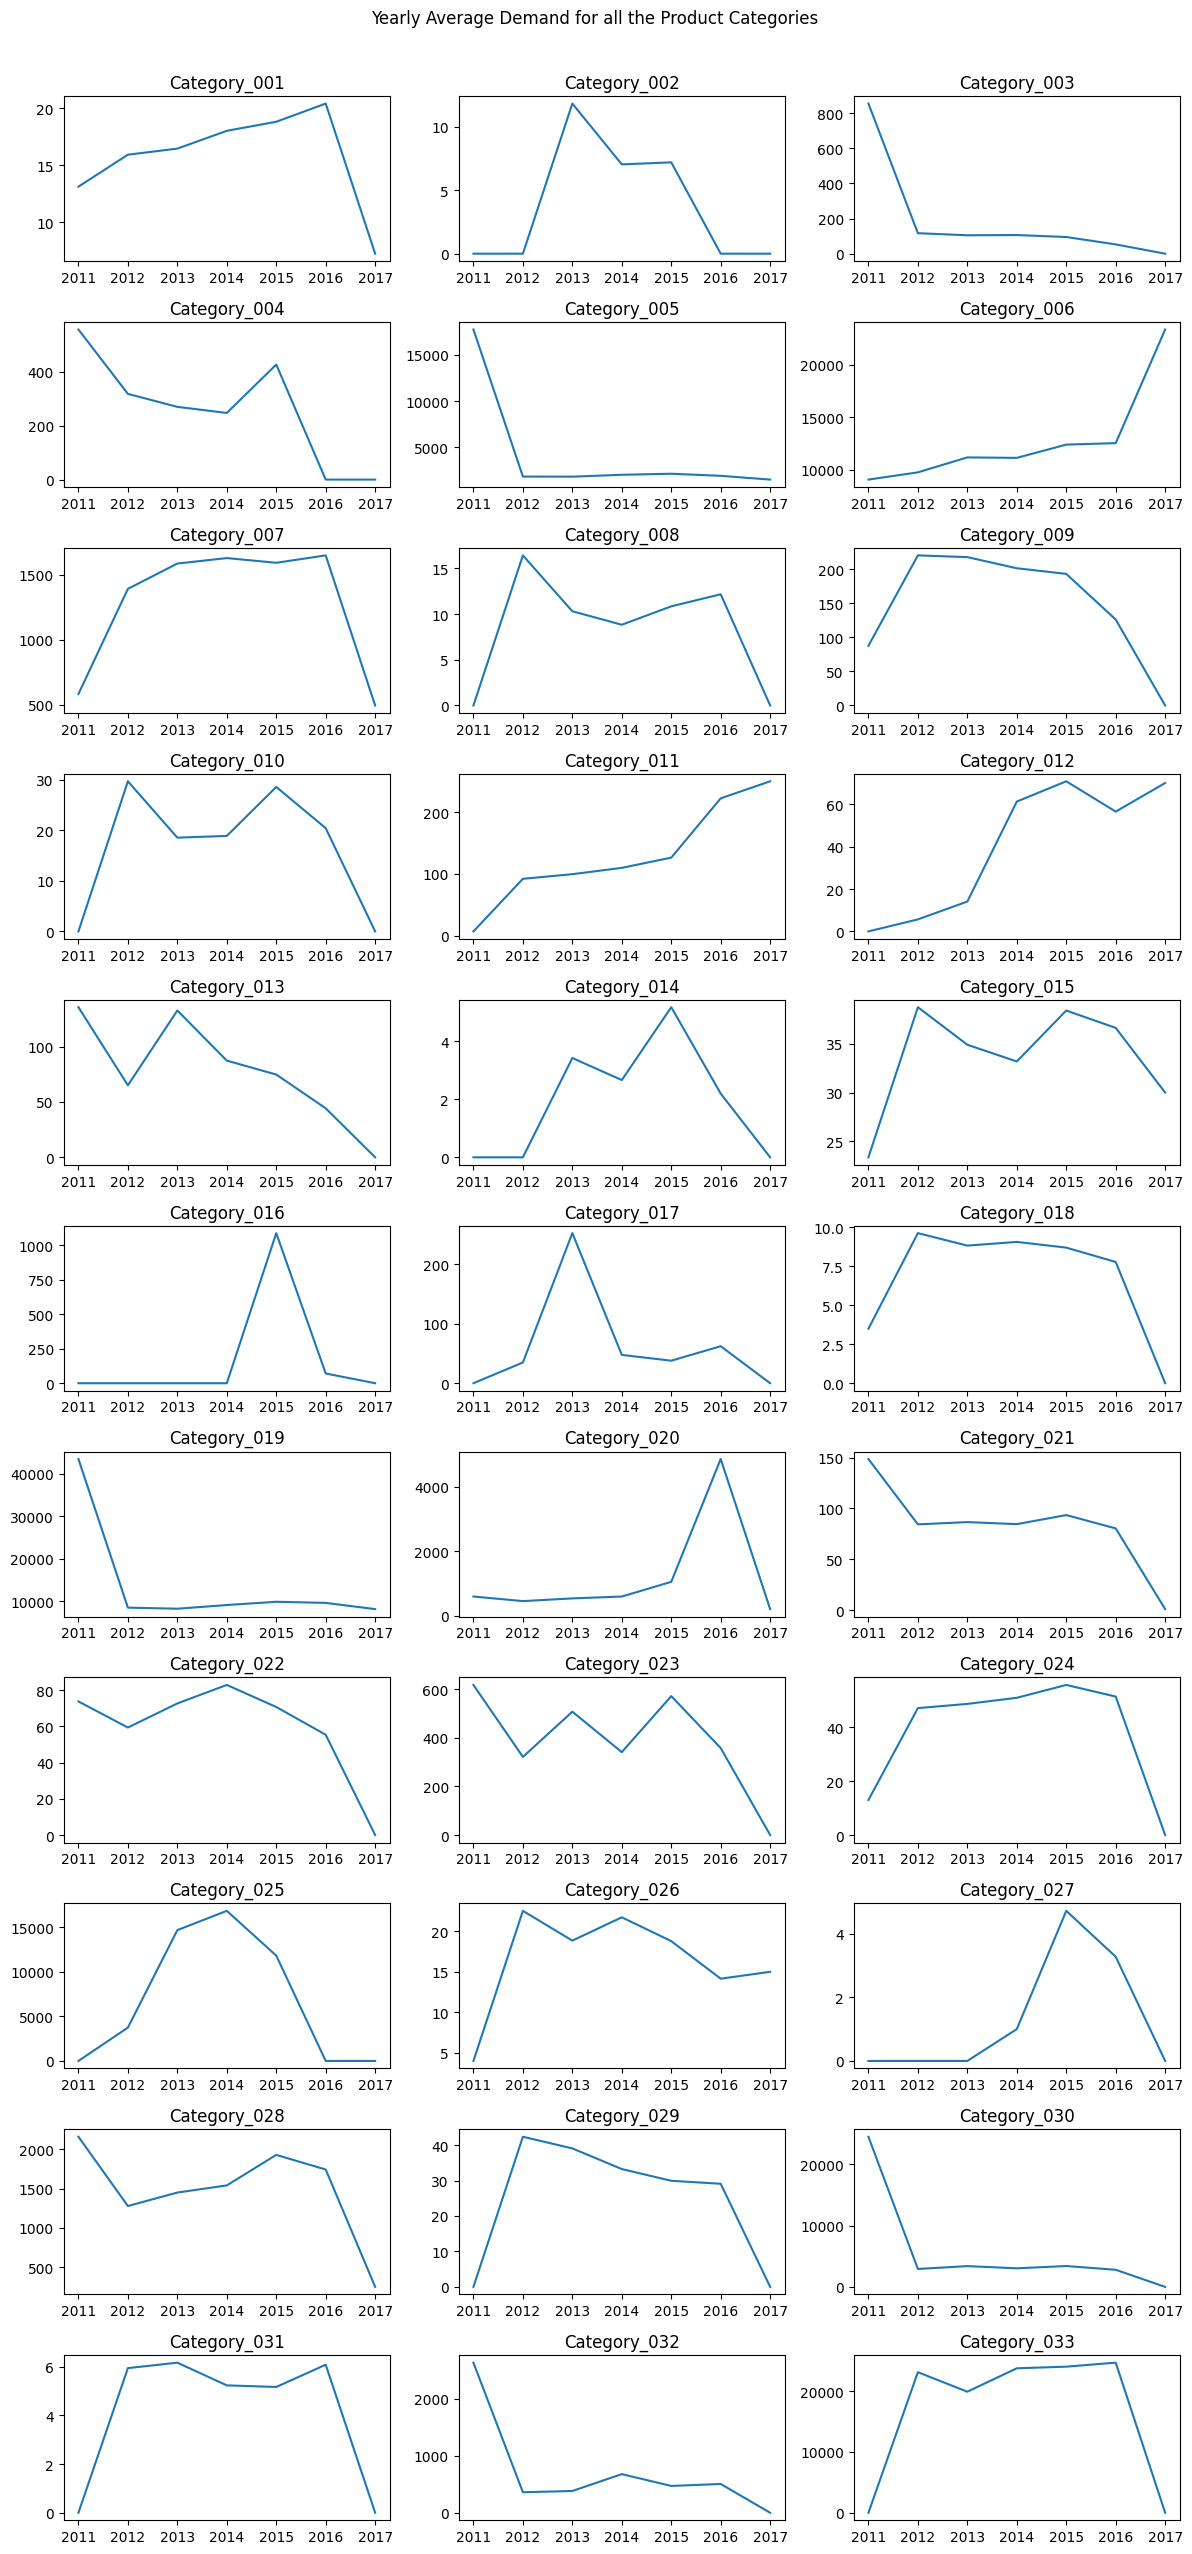

In [ ]:
padded_category_data = {}
for category, category_data in category_yearly_demand.groupby(level = 'Product_Category'):
    padded_category_data[category] = [0 for _ in range(7)]
    for year, total_demand in category_data.items():
        index = ((year[0] - 2010) % 7) - 1
        padded_category_data[category][index] = total_demand

fig = plt.figure(figsize=(12, 25))
rows, cols = 11, 3
x = [2011, 2012, 2013, 2014, 2015, 2016, 2017]

for title, data in padded_category_data.items():
    ax = fig.add_subplot(rows, cols, int(title[-2:]))
    ax.plot(x, data)
    ax.set_title(title)
plt.tight_layout()
fig.suptitle("Yearly Average Demand for all the Product Categories", y=1.02)

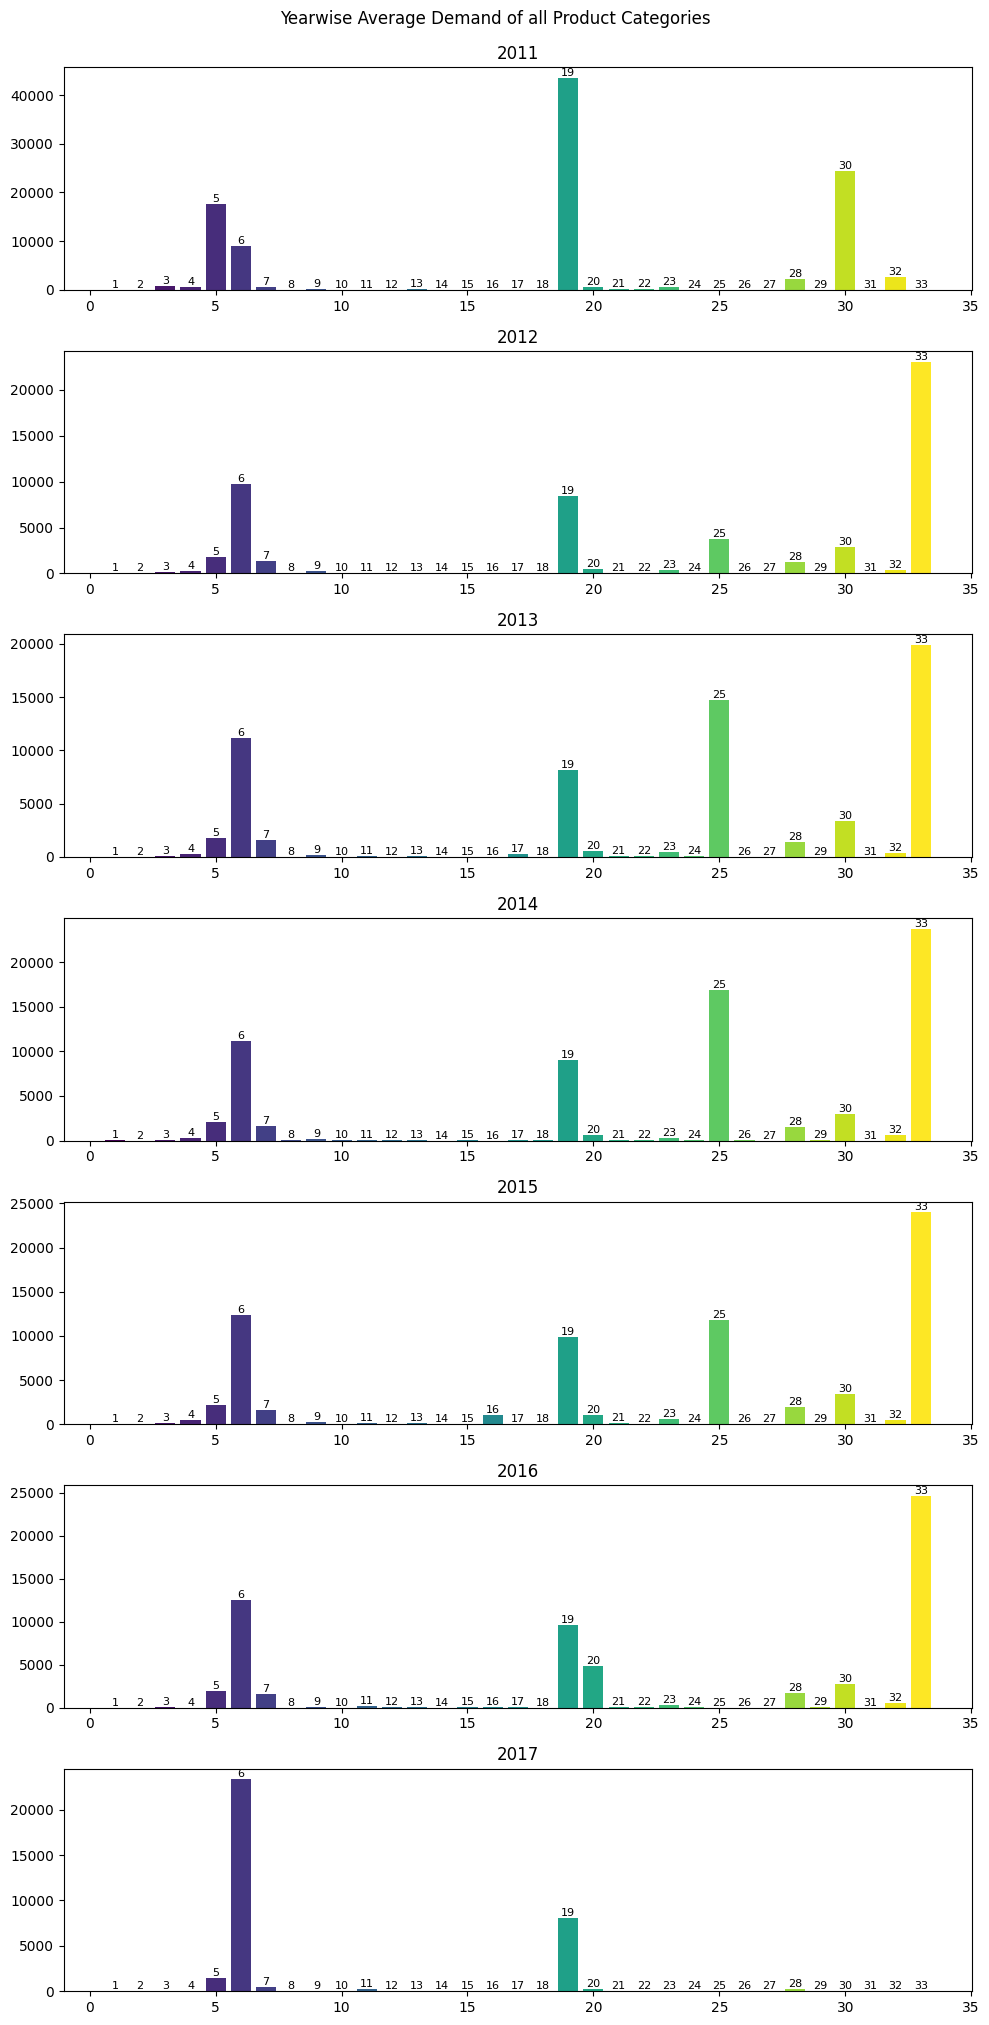

In [ ]:
padded_yearly_categories = {}
for year, year_data in category_yearly_demand.groupby(level = 'Date'):
    padded_yearly_categories[year] = [0 for _ in range(33)]
    for category, total_demand in year_data.items():
        index = (int(category[1][-2:]) % 33) - 1
        padded_yearly_categories[year][index] = total_demand
x = [i+1 for i in range(33)]
rows = len(padded_yearly_categories)
cols = 1
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(10, 20))
colors = plt.cm.viridis(np.linspace(0, 1, len(x)))
for i, (year, data) in enumerate(padded_yearly_categories.items()):
    bars = axes[i].bar(x, data, color=colors)
    axes[i].bar_label(bars, labels=x, fontsize = 8)
    axes[i].set_title(year)
plt.tight_layout()
fig.suptitle("Yearwise Average Demand of all Product Categories", y=1.01)
plt.show()

In [ ]:
from matplotlib import rcParams

In [ ]:
#Stastical analysis-Univariate
df['Warehouse'].value_counts().sort_values(ascending = False)

Warehouse
Whse_J    764447
Whse_A    142335
Whse_S     88200
Whse_C     42354
Name: count, dtype: int64

So here we can analyise that warehouse J is shipping more orders and the ordered demand is also very high.


33


<Axes: xlabel='count', ylabel='Product_Category'>

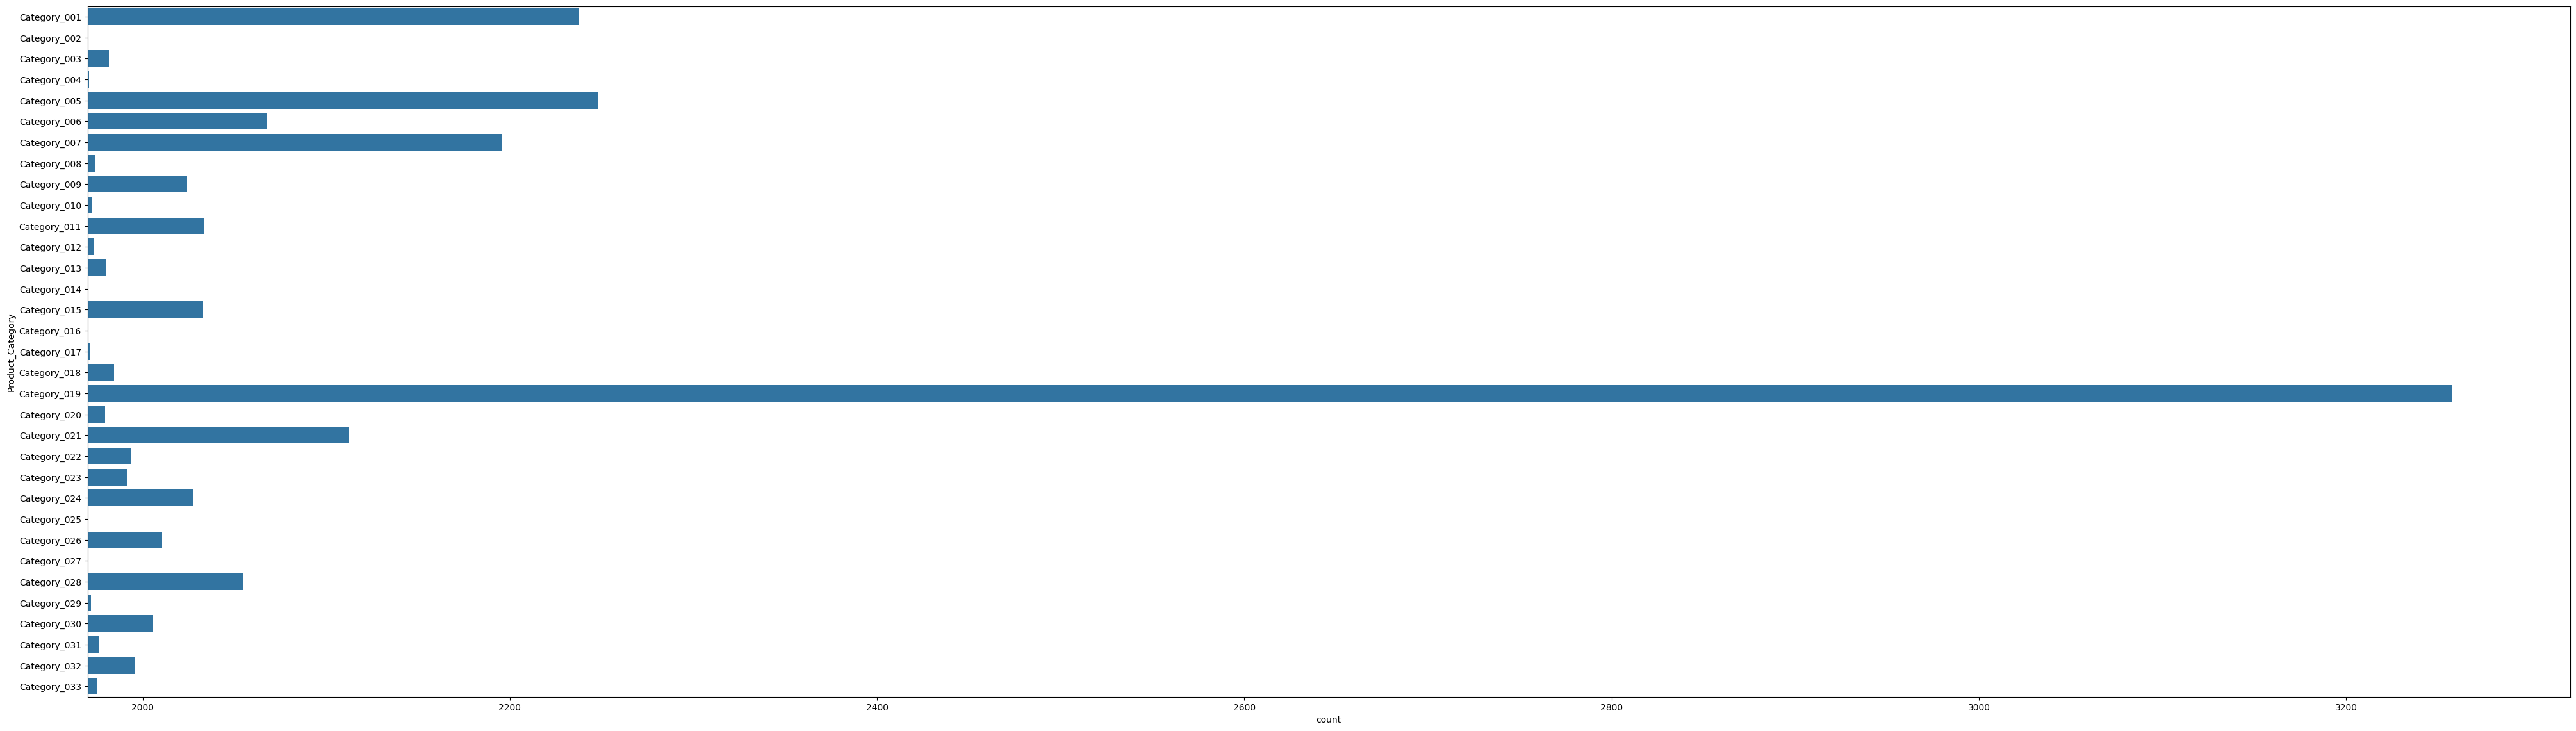

In [ ]:
print (len(df['Product_Category'].value_counts()))

rcParams['figure.figsize'] = 50,14
sns.countplot(df['Product_Category'].sort_values(ascending = True))

Product with category_19 is been shipped much more higher than any other categories including all the warehouses.


Bivariate analysis-prouct category and warehouse with target variables


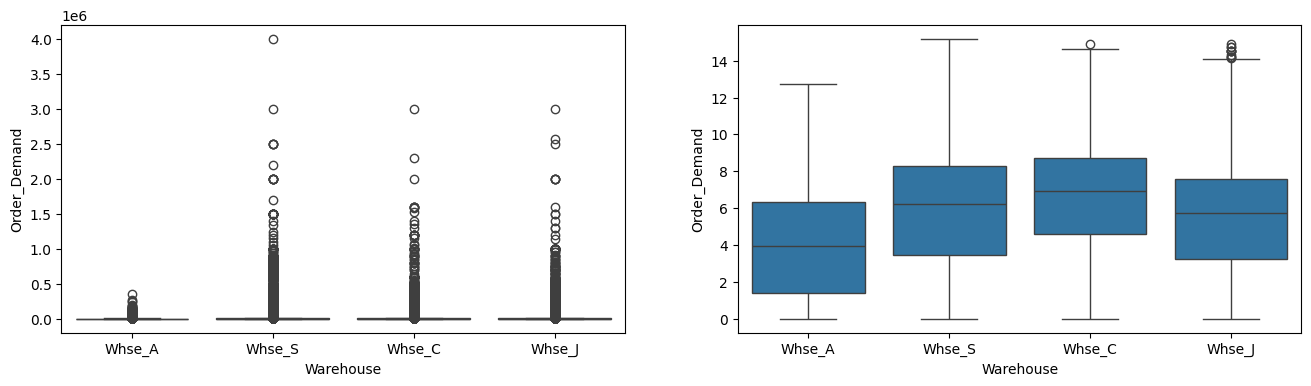

In [ ]:
rcParams['figure.figsize'] = 16,4
f, axes = plt.subplots(1, 2)
df['Order_Demand'] = pd.to_numeric(df['Order_Demand'], errors='coerce')
fig3 = sns.boxplot(x= df['Warehouse'], y=df['Order_Demand'], ax = axes[0])
fig4 = sns.boxplot(x= df['Warehouse'], y=np.log1p(df['Order_Demand']),ax = axes[1])
del fig3, fig4

<ipython-input-23-4fd1ca14d09f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig1 = sns.boxplot(x= df_temp['Product_Category'].sort_values(),y=np.log1p(df_temp['Order_Demand']),palette=palette)


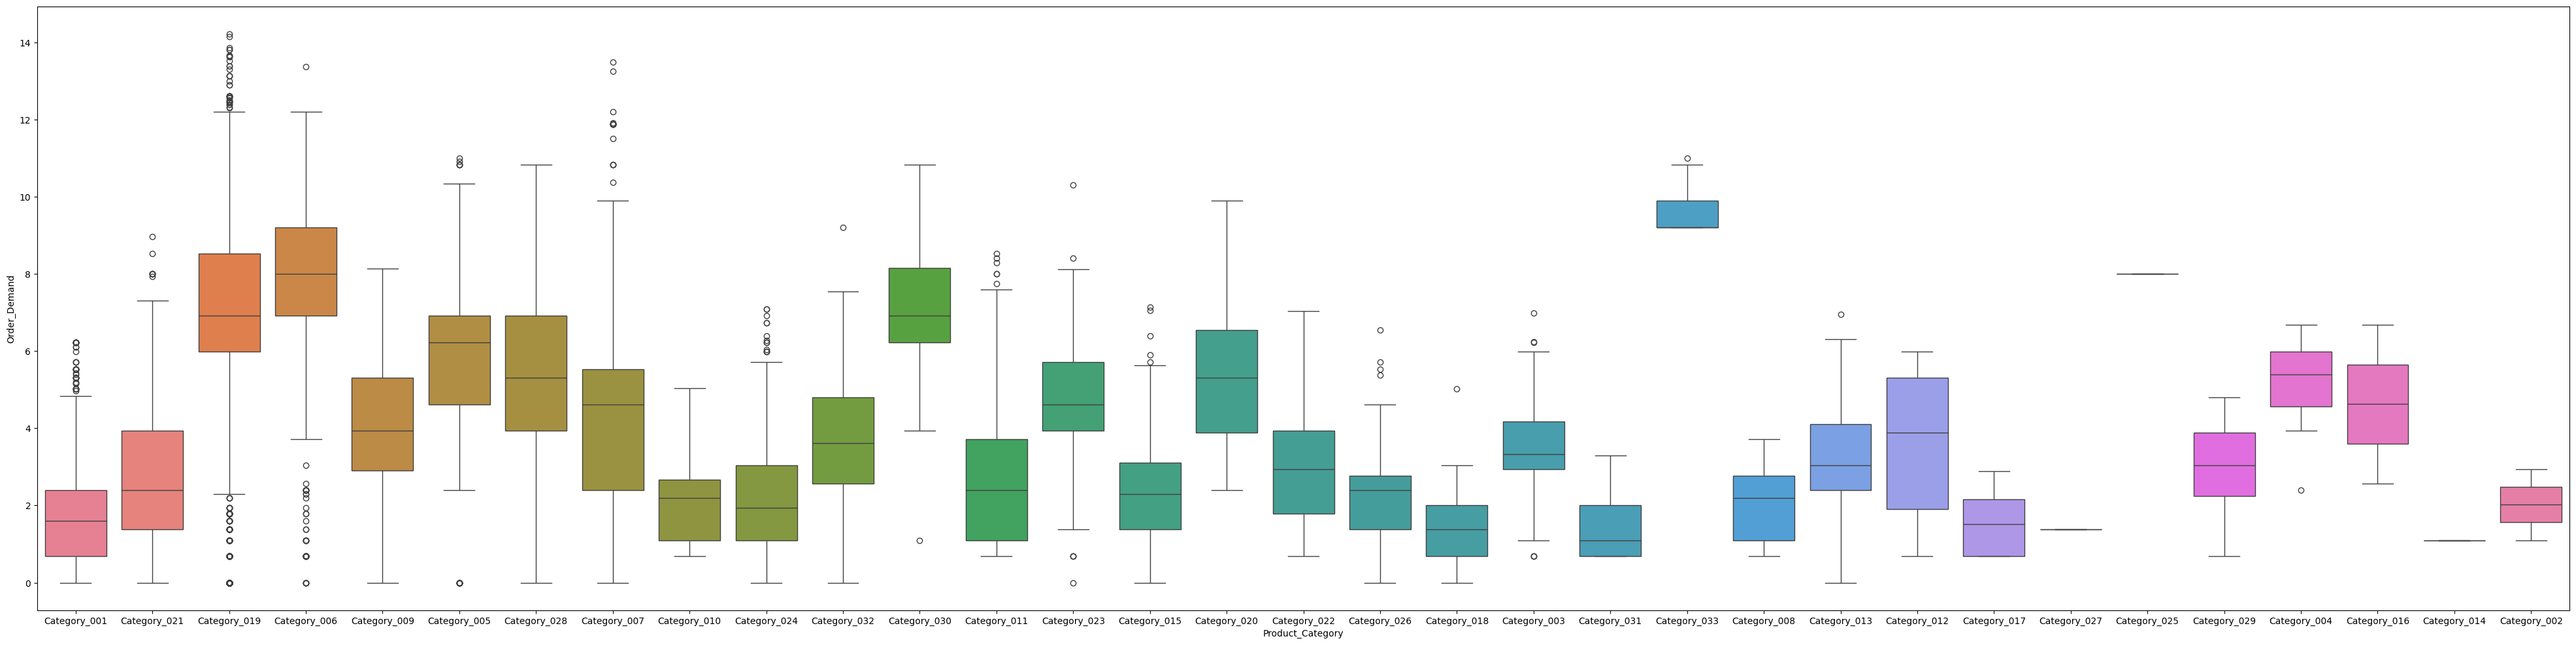

In [ ]:

rcParams['figure.figsize'] = 50,12
df_temp = df.sample(n=20000).reset_index()
palette = sns.color_palette("husl", len(df_temp['Product_Category'].unique()))
fig1 = sns.boxplot(x= df_temp['Product_Category'].sort_values(),y=np.log1p(df_temp['Order_Demand']),palette=palette)
del df_temp, fig1

Considering the data as a time series for forecasting


In [ ]:
df = df.groupby('Date')['Order_Demand'].sum().reset_index()

In [ ]:
df = df.set_index('Date')
df.index

DatetimeIndex(['2011-01-08', '2011-05-31', '2011-06-24', '2011-09-02',
               '2011-09-27', '2011-09-30', '2011-10-20', '2011-10-31',
               '2011-11-04', '2011-11-18',
               ...
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-09'],
              dtype='datetime64[ns]', name='Date', length=1729, freq=None)

In [ ]:
y = df['Order_Demand'].resample('MS').mean()

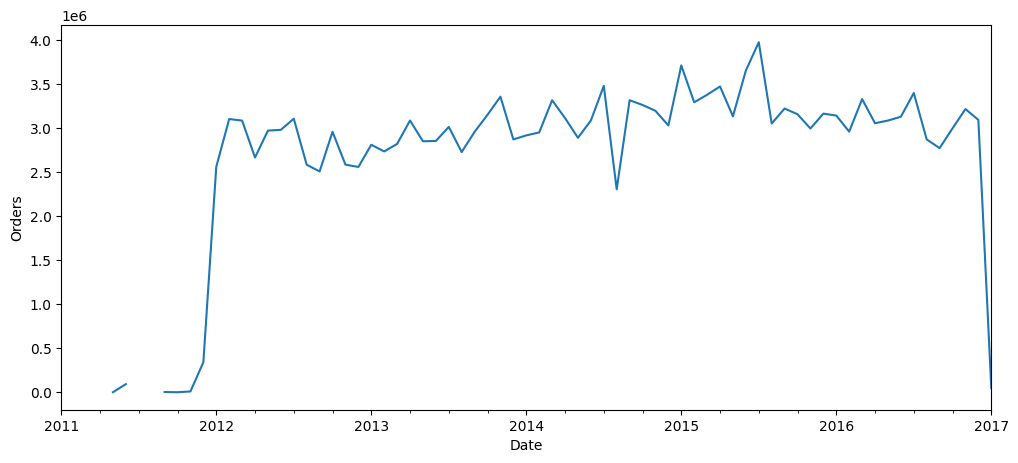

In [ ]:
y.plot(figsize=(12,5))
plt.xlabel('Date')
plt.ylabel('Orders')
plt.show()

Here we can see that at the starting of the month the sales are very low whereas the peak in sales occurs during 2015-2016 yr and the trend can be seen above

Futher on the time series analysis can be break down into different factors such as trends , seasonality, residuals etc....

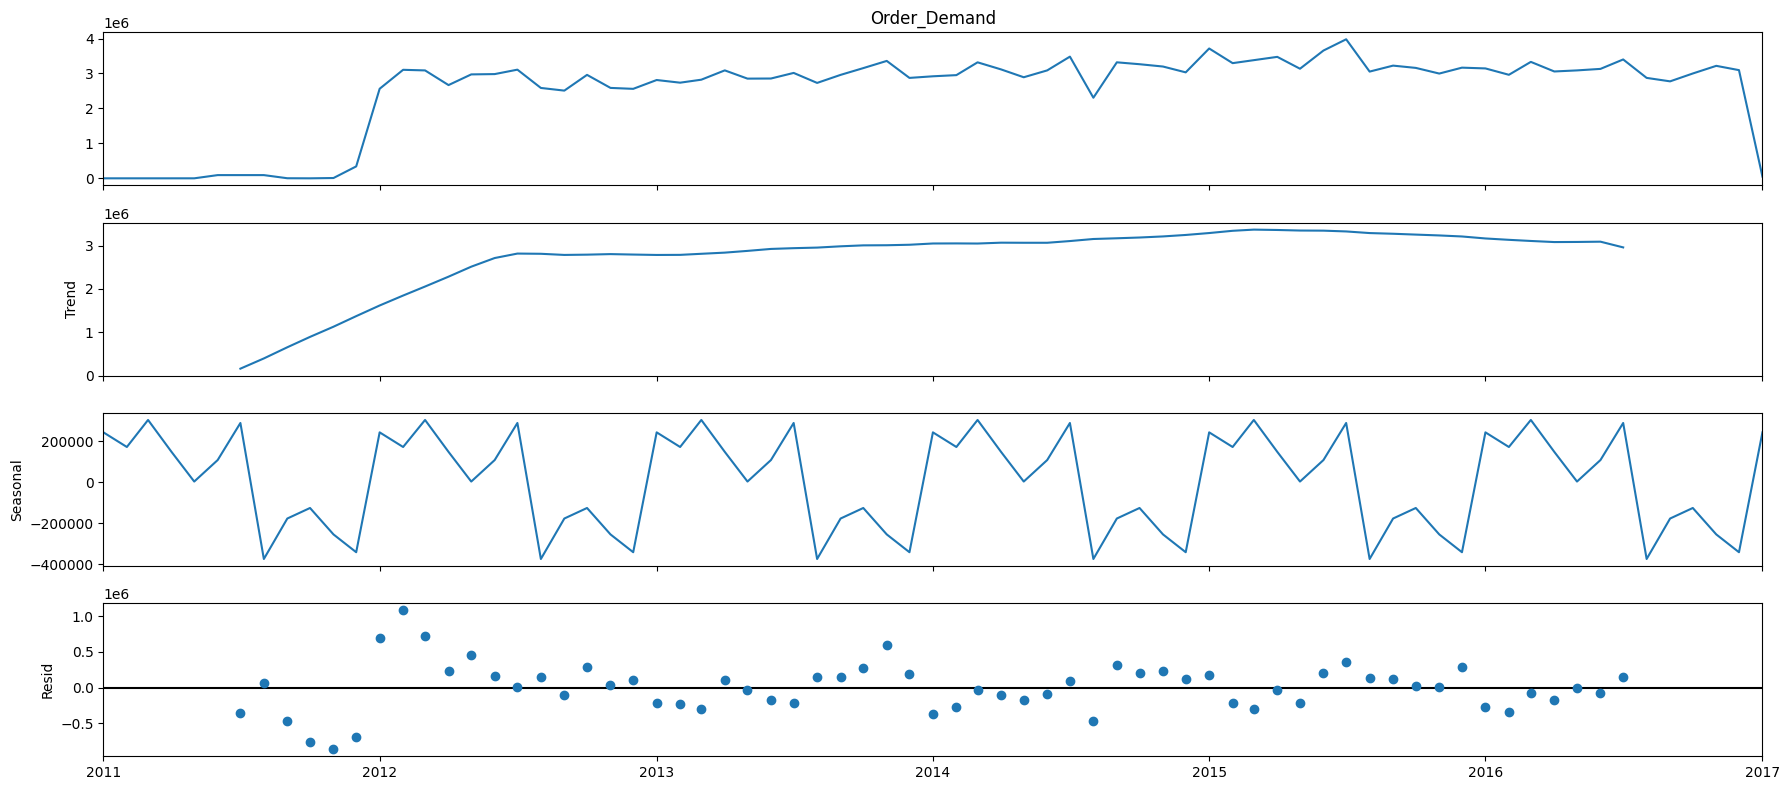

In [ ]:
from pylab import rcParams
import statsmodels.api as sm
if y.isnull().sum() > 0:
    y = y.fillna(method='ffill')
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('SARIMAX1: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX2: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX3: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX4: {} x {}'.format(pdq[2], seasonal_pdq[4]))


for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

SARIMAX1: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX2: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX3: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX4: (0, 1, 0) x (1, 0, 0, 12)
SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2344.0725874471186
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1934.0821060813932
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1862.0101867036954
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1413.1954170987105
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1897.2735210354695
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1994.5956032641618
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1440.5974740527085
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1414.083614885848
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2265.269942929812
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1876.5050154868898
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1790.1219024704828
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1411.8345179989278
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1934.7741794209815
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1872.8138323271457
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1471.396926540257
SARI

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2946      0.655      0.450      0.653      -0.988       1.578
ma.L1         -0.9862      0.018    -54.727      0.000      -1.022      -0.951
ar.S.L12       2.7146      0.836      3.248      0.001       1.076       4.353
ma.S.L12      -2.7420      0.805     -3.405      0.001      -4.320      -1.164
sigma2      3.701e+11    2.4e-12   1.54e+23      0.000     3.7e+11     3.7e+11


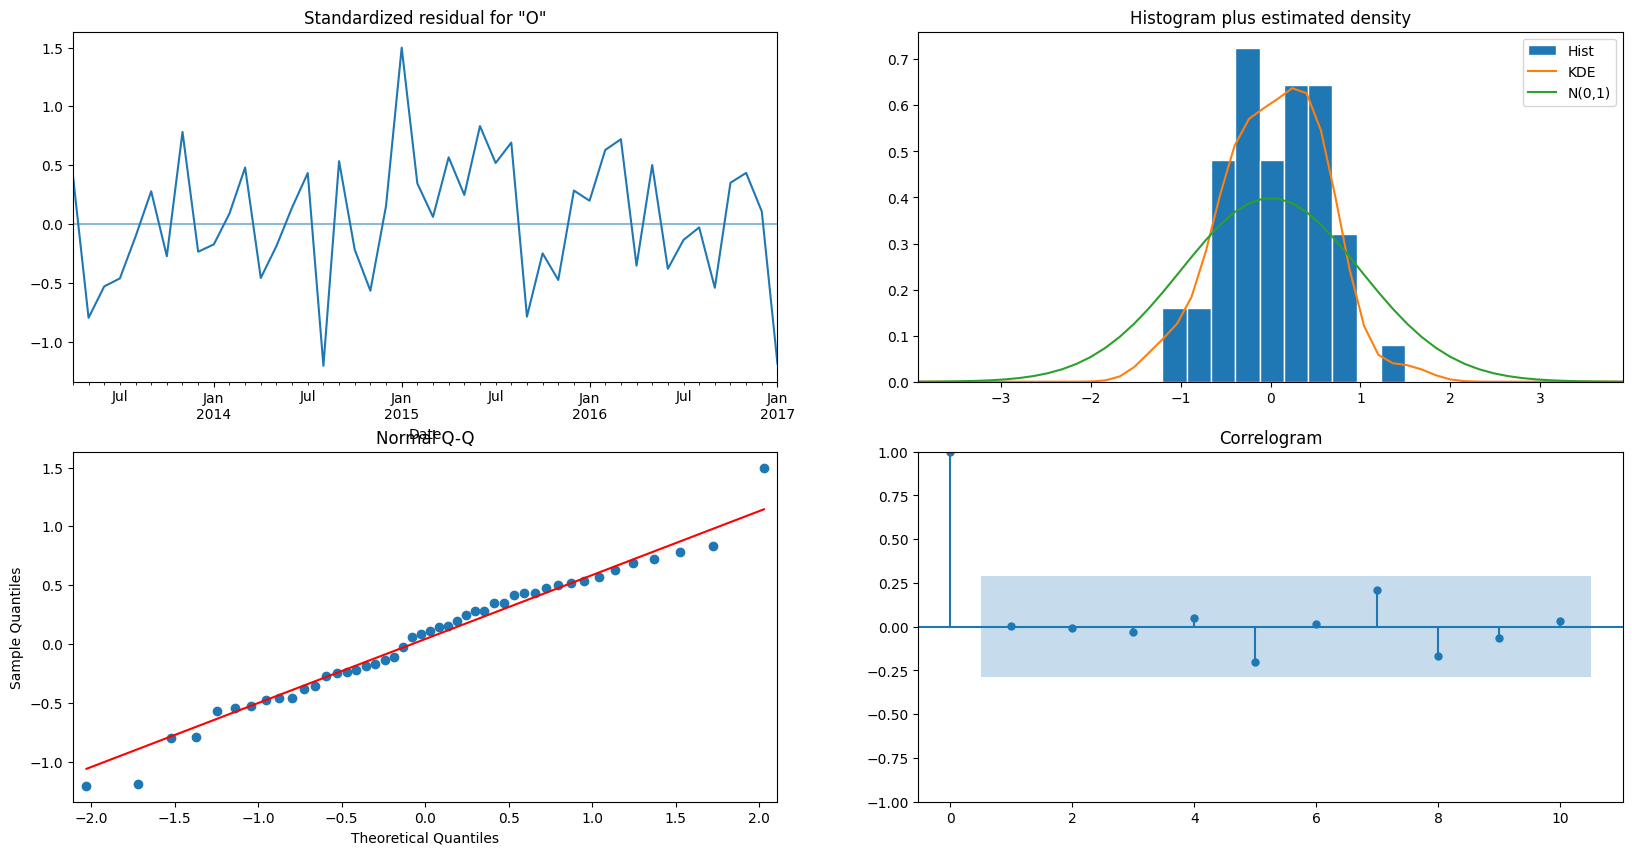

In [ ]:
results.plot_diagnostics(figsize=(20, 10))
plt.show()


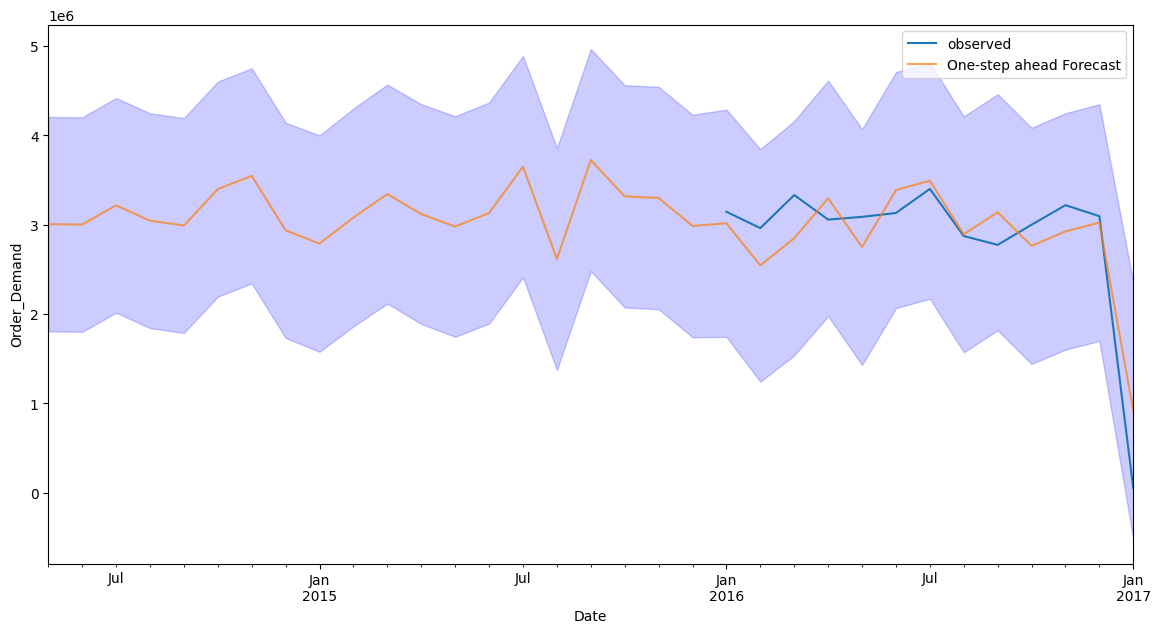

In [ ]:

pred = results.get_prediction(start=pd.to_datetime('2014-05-01'), dynamic=False)

pred_ci = pred.conf_int()

ax = y['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='blue', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Order_Demand')
plt.legend()
plt.show()



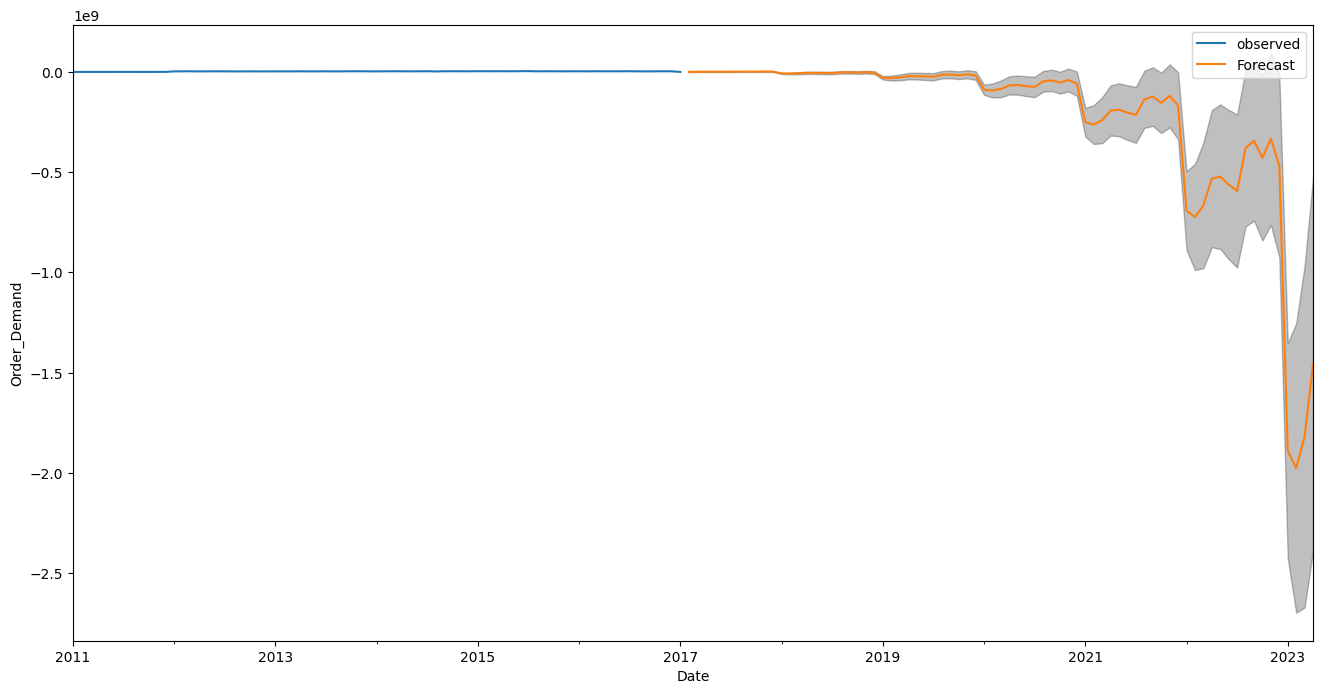

In [ ]:
pred_uc = results.get_forecast(steps=75)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(16, 8))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Order_Demand')
plt.legend()
plt.show()

In [ ]:

y_forecasted = pred.predicted_mean
y_truth = y['2016-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('MSE {}'.format(round(mse, 2)))
print('RMSE: {}'.format(round(np.sqrt(mse), 2)))



MSE 131018448162.86
RMSE: 361964.71


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1729 entries, 2011-01-08 to 2017-01-09
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Order_Demand  1729 non-null   int64
dtypes: int64(1)
memory usage: 27.0 KB
